# Import packages for project

In [3]:
import pandas as pd
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [4]:
# Open File
with open('../data/world_bank_projects.json') as file:
    df = pd.read_json(file)

# 1. Find the 10 countries with most projects

In [63]:
top10countries = df.countryname.value_counts(dropna= False)[:10]
df['countryname'].value_counts(dropna= False)[:10]

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

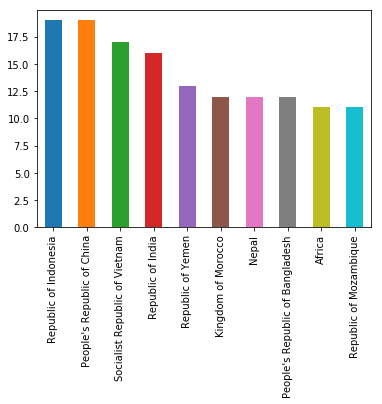

In [61]:
df['countryname'].value_counts()[:10].plot(kind = 'bar')

# 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [10]:
df.mjtheme_namecode.value_counts(dropna = False)[:10]

[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '11', 'name': 'Environment and natural resources management'}]                                                                                12
[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]                                                                                                                                                        11
[{'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]                                                                                                                                         8
[{'code': '4', 'name': 'Financial and private sector development'}, {'code': '4', 'name': 'Financial and private sector development'}]                                                                                           6
[{'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector gov

In [18]:
# Compile huge list of mj theme names and codes
themes = df['mjtheme_namecode']
mjtheme = []
for row in themes:
    for theme in row:
        mjtheme.append(theme)

mjtheme = pd.DataFrame(mjtheme)
mjtheme.name.value_counts(dropna = False)[:10]

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

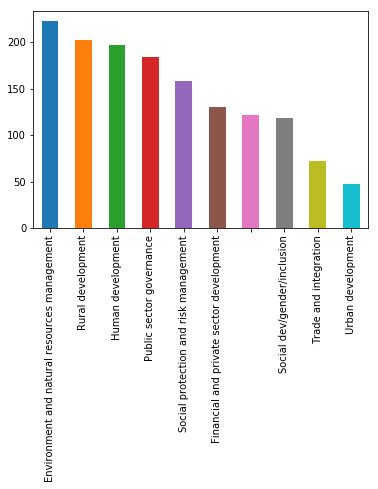

In [19]:
mjtheme['name'].value_counts()[:10].plot(kind = 'bar')

## 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [11]:
df.mjtheme_namecode[0][1]

{'code': '11', 'name': ''}

In [12]:
# Creating Lookup Dictionary
themes = pd.DataFrame(df[['mjtheme', 'mjthemecode']])
themes = themes.dropna()
lookup = defaultdict()

for index, values in themes.iterrows():
    i = 0
    codes = values['mjthemecode'].split(sep=',')
    for theme in values['mjtheme']:
        code = codes[i]
        if code not in lookup.keys():
            lookup[code] = theme
        i += 1

In [39]:
# Filling in missing names
i = 0
for row in df['mjtheme_namecode']:
    r = 0
    for item in row:
        if item['name'] == '':
            df['mjtheme_namecode'][i][r]['name'] = lookup[item['code']]
        r += 1
    i += 1

Below is the updated top 10 major project teams.

In [40]:
df.mjtheme_namecode.value_counts(dropna = False)[:10]

[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '11', 'name': 'Environment and natural resources management'}]             17
[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': 'Environment and natural resources management'}]                                         12
[{'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]                                                                     11
[{'code': '6', 'name': 'Social protection and risk management'}, {'code': '6', 'name': 'Social protection and risk management'}]                              8
[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '4', 'name': 'Financial and private sector development'}]                   7
[{'code': '4', 'name': 'Financial and private sector development'}, {'code': '4', 'name': 'Financial and private sector development'}]                        7
[{'code': '2', 'name': 'Public sector go